In [ ]:
!pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import string


In [ ]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("customer_support_tickets.csv")  # replace with actual filename
df.head()


Saving customer_support_tickets.csv to customer_support_tickets.csv


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


<ipython-input-7-bb2122dc999f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ticket_counts, x='Count', y='Ticket Type', palette='Set2')


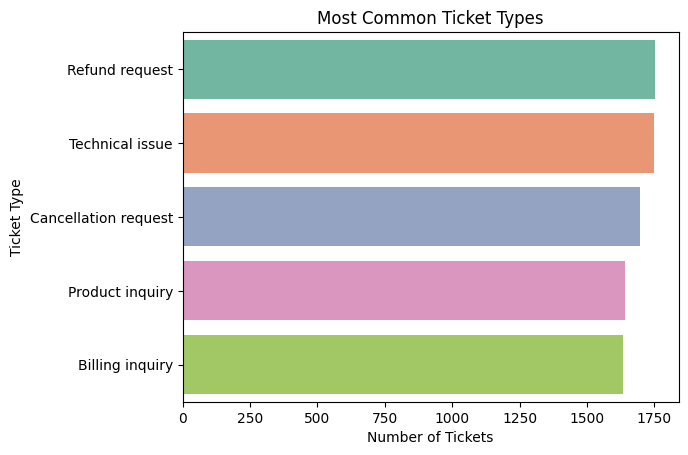

In [ ]:
ticket_counts = df['Ticket Type'].value_counts().reset_index()
ticket_counts.columns = ['Ticket Type', 'Count']

# Plot
sns.barplot(data=ticket_counts, x='Count', y='Ticket Type', palette='Set2')
plt.title("Most Common Ticket Types")
plt.xlabel("Number of Tickets")
plt.ylabel("Ticket Type")
plt.show()


In [ ]:
# Convert to datetime
df['First Response Time'] = pd.to_datetime(df['First Response Time'], errors='coerce')
df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'], errors='coerce')

# Calculate resolution time in hours
df['Resolution Hours'] = (df['Time to Resolution'] - df['First Response Time']).dt.total_seconds() / 3600


<ipython-input-9-a5e47eb76205>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_resolution, x='Avg Resolution Time (hrs)', y='Ticket Type', palette='pastel')


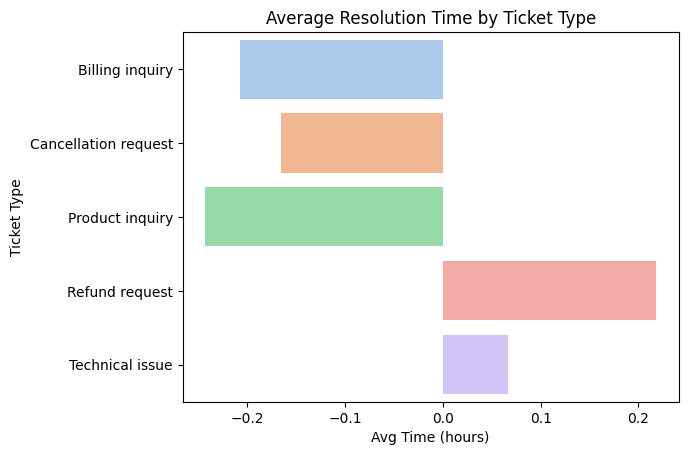

In [ ]:
avg_resolution = df.groupby('Ticket Type')['Resolution Hours'].mean().reset_index()
avg_resolution.columns = ['Ticket Type', 'Avg Resolution Time (hrs)']

# Plot
sns.barplot(data=avg_resolution, x='Avg Resolution Time (hrs)', y='Ticket Type', palette='pastel')
plt.title("Average Resolution Time by Ticket Type")
plt.xlabel("Avg Time (hours)")
plt.ylabel("Ticket Type")
plt.show()


In [ ]:
summary = pd.merge(ticket_counts, avg_resolution, on='Ticket Type', how='left')
summary.to_csv("Task2_Summary_Report.csv", index=False)

from google.colab import files
files.download("Task2_Summary_Report.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>